In [2]:
import matplotlib.pyplot as plt
from collections import OrderedDict
import numpy as np
import pickle
import matplotlib.patches as mp

OrderedDict([('Aggression', 0.3333333333333333), ('Agressionsabbau', 0.3333333333333333), ('Alltag', 0.3333333333333333), ('Alltag/Nachts', 0.3333333333333333), ('Disziplin', 0.3333333333333333), ('Durch', 0.3333333333333333), ('Emotionen', 0.3333333333333333), ('Frust', 0.3333333333333333), ('Gleichgewicht', 0.3333333333333333), ('Gutes', 0.3333333333333333), ('Hilft', 0.3333333333333333), ('Kampfkunst', 0.3333333333333333), ('Körper', 0.3333333333333333), ('Leben', 0.3333333333333333), ('Mehr', 0.3333333333333333), ('Mentale', 0.3333333333333333), ('Personen', 0.3333333333333333), ('Schnellkraft', 0.3333333333333333), ('Selbsbewusst', 0.3333333333333333), ('Selbstbewusstsein', 0.3333333333333333), ('Selbstverteidigung', 1.0), ('Selbstvertrauen', 0.3333333333333333), ('Selbstwertgefühl', 0.3333333333333333), ('Sicherheitsgefühl', 0.3333333333333333), ('Situationen', 0.3333333333333333), ('Stärke', 0.6666666666666666), ('Weiterbildung', 0.3333333333333333), ('Würde', 0.3333333333333333

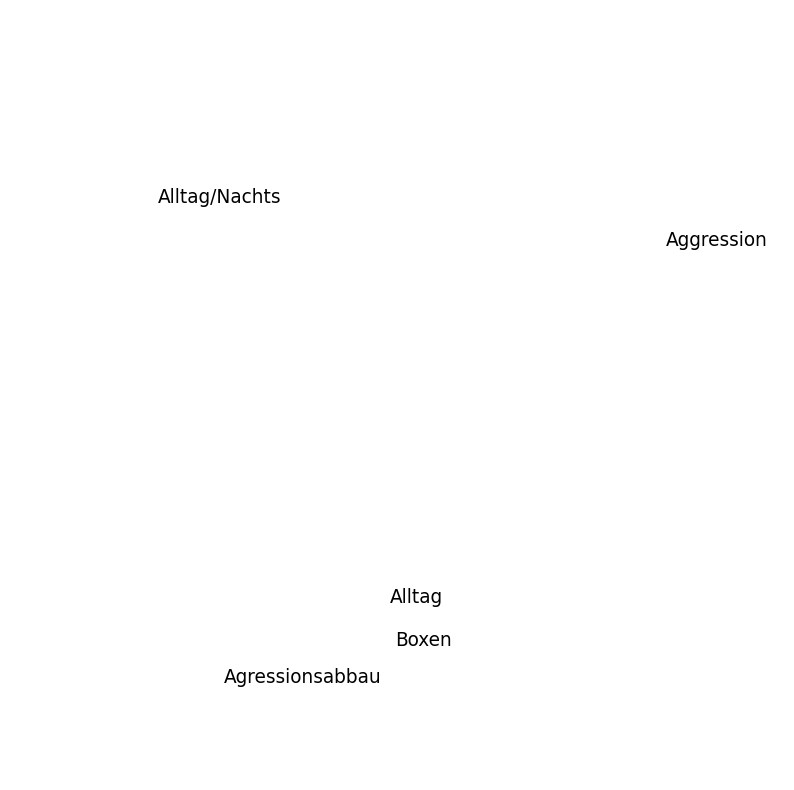

In [36]:
class wordcloud:

    def __init__(self,str,ax):
        self.ax = ax
        self.wordCount, self.wordFreq = self.countWords(str)
        self.drawWords(self.wordFreq)
        self.styleAxis(ax)
    
    def similarMeaing(self,str1,l):
        for item in l:
            for i,(el1,el2) in enumerate(zip(str1,item)):
                if i >= 3: print(item,str1); return item
                else: return None

    def countWords(self,str):
        allWords = str.split(" ")[:100]
        allWords = [word.replace(" ","").replace("(","").replace(")","").replace(".","").replace(",","") for word in allWords]
        allWords = [word for word in allWords if len(word)>3]
        wordCount = {}
        for word in allWords:
            if word in wordCount.keys(): wordCount[word] += 1
            else:
                meaning = self.similarMeaing(word,list(wordCount.keys()))
                if meaning!=None: wordCount[meaning] += 1
                else: wordCount[word] = 1
                        
        wordFreq = {}
        for word,count in wordCount.items():
            wordFreq[word] = count / np.max([i for i in wordCount.values()])
        return wordCount, OrderedDict(sorted(wordFreq.items()))

    def getTextBoundingBox(self,artist):
        r = self.ax.get_figure().canvas.get_renderer()
        bb = artist.get_window_extent(renderer=r).transformed(self.ax.transData.inverted())
        #ax.add_patch(mp.Rectangle((bb.x0,bb.y0),width=bb.x1-bb.x0,height=bb.y1-bb.y0,color="green"))
        return bb

    def BBcheck(self,textArtist):
        is_blocked = False
        for artist in self.ax.get_children():
            if artist == textArtist: continue
            if type(artist) != type(textArtist): continue
            tA_bb = self.getTextBoundingBox(textArtist)
            a_bb = self.getTextBoundingBox(artist)
            if ((tA_bb.x0 > a_bb.x0) and (tA_bb.x1 < a_bb.x1*2)) and ((tA_bb.y0 > a_bb.y0) and (tA_bb.y1 < a_bb.y1*2)): is_blocked=True
        return is_blocked

    def drawWords(self,wordDic):
        for word,n in wordDic.items():
            pos = np.random.random_sample(size=2)
            text_item = self.ax.text(*pos,word,fontsize=n*40)
            if self.BBcheck(text_item):
                newdic = wordDic.copy()
                newdic.pop(word)
                print(newdic,word)
                break
                self.drawWords(newdic)
    
    def styleAxis(self,ax):
        ax.set_xlim(-0.1,1.1); ax.set_ylim(-0.1,1.1)
        ax.spines.top.set_visible(False); ax.spines.bottom.set_visible(False); ax.spines.left.set_visible(False); ax.spines.right.set_visible(False)
        ax.set_xticks([]); ax.set_yticks([])

    def set_wordCount(self,wordCount):
        self.wordCount = wordCount
    def get_wordCount(self):
        return self.wordCount

with open("SQ.p","rb") as file: SQ = pickle.load(file)
strings = list(SQ.iloc[:,-2].dropna())
teststr3 = " ".join(strings)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cloud = wordcloud(teststr3,ax)
plt.show()

In [19]:
cloud.get_wordCount()

{}